In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional

from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import statsmodels as sm
from sklearn import svm
import string
import re
import sys
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import GridSearchCV
np.random.seed(0)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#importer les biblio
import sklearn.metrics as metrics
import sklearn
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import pyplot
import scikitplot as skplt

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
number_of_samples = 10000

In [ ]:
data_attack = pd.read_csv('/content/drive/MyDrive/dataset_attack.csv', nrows = number_of_samples)

In [ ]:
data_normal = pd.read_csv('/content/drive/MyDrive/dataset_normal.csv', nrows = number_of_samples)

In [ ]:
data_normal.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']
data_attack.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta','class']

In [ ]:
data_normal=data_normal.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)
data_attack=data_attack.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [ ]:
features=[ 'frame.len', 'ip.hdr_len',
       'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
       'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport',
       'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
       'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
       'tcp.time_delta']

In [ ]:
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

x = min_max_scaler.fit_transform(X)

x

array([[1.00412655e-01, 1.00000000e+00, 1.28000000e-01, ...,
        0.00000000e+00, 1.65743498e-01, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 2.66666667e-02, ...,
        0.00000000e+00, 7.44887830e-02, 1.29209878e-05],
       [0.00000000e+00, 1.00000000e+00, 2.66666667e-02, ...,
        0.00000000e+00, 7.44887830e-02, 3.72952162e-06],
       ...,
       [1.04539202e-01, 1.00000000e+00, 1.32000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 2.66666667e-02, ...,
        0.00000000e+00, 1.55280921e-01, 4.33762613e-03],
       [1.37551582e-03, 1.00000000e+00, 3.20000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
for i in range(0,len(Y)):
  if Y[i] =="attack":
    Y[i]=1
  else:
    Y[i]=0

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x, Y,test_size=0.3, stratify=Y)

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3, stratify=y_train)

In [ ]:
x_l=X_train.tolist()
y_l=y_train.tolist()
x_a=np.array(x_l)
y_a=np.array(y_l)
x_l=[]
y_l=[]
xt_l=X_test.tolist()
yt_l=y_test.tolist()
xt_a=np.array(xt_l)
yt_a=np.array(yt_l)
xt_l=[]
yt_l=[]
xv_l=X_val.tolist()
yv_l=y_val.tolist()
xv_a=np.array(xv_l)
yv_a=np.array(yv_l)
xv_l=[]
yv_l=[]

Random forest:

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.fit(x_a,y_a)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
#Predict the response for test dataset
predictions = clf.predict(xt_a)
predictions

array([0, 1, 0, ..., 0, 0, 0])

[[2900  100]
 [ 926 2074]]


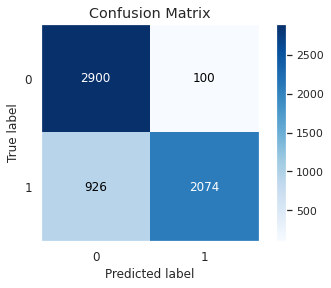

In [ ]:
print(metrics.confusion_matrix(yt_a,predictions))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a,predictions)

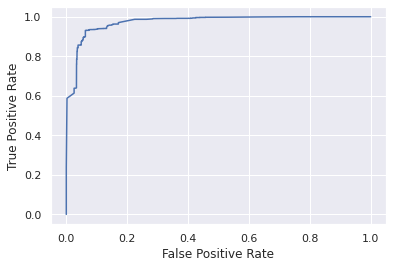

In [ ]:
#define metrics
y_pred_proba = clf.predict_proba(xt_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
acc = metrics.accuracy_score(yt_a, predictions)
print("Accuracy = %.2f" %(acc))
f1 = metrics.f1_score(yt_a, predictions)
print("F1 = %.2f" %(f1))
p = metrics.precision_score(yt_a, predictions)
print("Precision = %.2f" %(p))
r = metrics.recall_score(yt_a, predictions)
print("Recall = %.2f" %(r))
loss = metrics.log_loss(yt_a, predictions)
print("log-loss = %.2f" %(loss))
auc = metrics.roc_auc_score(yt_a, predictions)
print("ROC-AUC = %.2f" %(auc))

Accuracy = 0.83
F1 = 0.80
Precision = 0.95
Recall = 0.69
log-loss = 5.91
ROC-AUC = 0.83


Adaboost classifier:

In [ ]:
ad=AdaBoostClassifier(base_estimator=clf)

In [ ]:
ad.fit(xt_a,yt_a)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                         random_state=0))

In [ ]:
y_pred = ad.predict(xv_a)

[[2087   13]
 [  18 2082]]


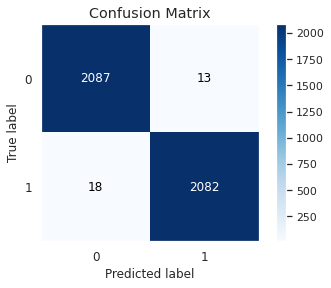

In [ ]:
print(metrics.confusion_matrix(yv_a,y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yv_a,y_pred)

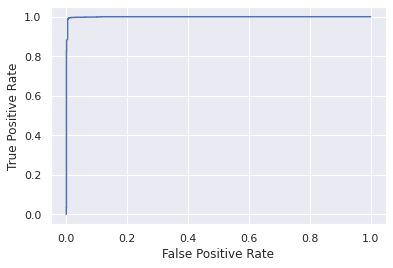

In [ ]:
#define metrics
y_pred_proba = ad.predict_proba(xv_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yv_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
acc = metrics.accuracy_score(yv_a,y_pred)
print("Accuracy = %.2f" %(acc))
f1 = metrics.f1_score(yv_a,y_pred)
print("F1 = %.2f" %(f1))
p = metrics.precision_score(yv_a,y_pred)
print("Precision = %.2f" %(p))
r = metrics.recall_score(yv_a,y_pred)
print("Recall = %.2f" %(r))
loss = metrics.log_loss(yv_a,y_pred)
print("log-loss = %.2f" %(loss))
auc = metrics.roc_auc_score(yv_a,y_pred)
print("ROC-AUC = %.2f" %(auc))

Accuracy = 0.99
F1 = 0.99
Precision = 0.99
Recall = 0.99
log-loss = 0.25
ROC-AUC = 0.99


SVM:

In [ ]:
SVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM.fit(x_a, y_a)

#Predict the response for test dataset
y_pred = SVM.predict(xt_a)

[[2802  198]
 [ 245 2755]]


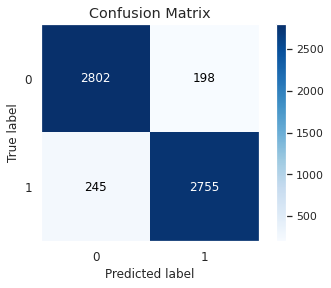

In [ ]:
print(metrics.confusion_matrix(yt_a, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a, y_pred)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yt_a, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(yt_a, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(yt_a, y_pred))

Accuracy: 0.9261666666666667
Precision: 0.9329495428377921
Recall: 0.9183333333333333


Gradient Boosting Classifier

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=60, learning_rate=0.09, max_depth=3, random_state=0).fit(x_a, y_a)

In [ ]:
y_pred = gb_clf.predict(xt_a)

[[2977   23]
 [  29 2971]]


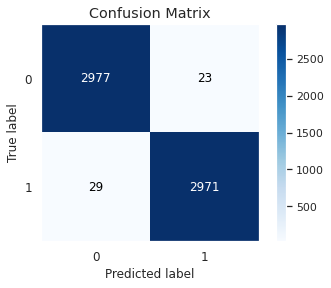

In [ ]:
print(metrics.confusion_matrix(yt_a, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a, y_pred)

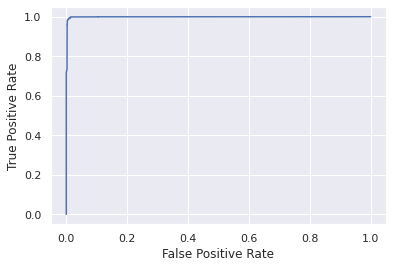

In [ ]:
#define metrics
y_pred_proba = gb_clf.predict_proba(xt_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yt_a, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(yt_a, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(yt_a, y_pred))

Accuracy: 0.9913333333333333
Precision: 0.9923179692718771
Recall: 0.9903333333333333


KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_a, y_a)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(xt_a)

[[2972   28]
 [  44 2956]]


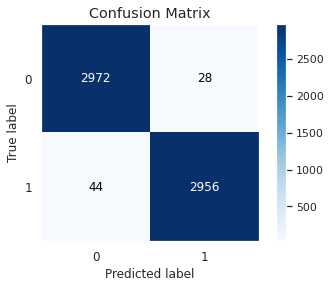

In [ ]:
print(metrics.confusion_matrix(yt_a, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a, y_pred)

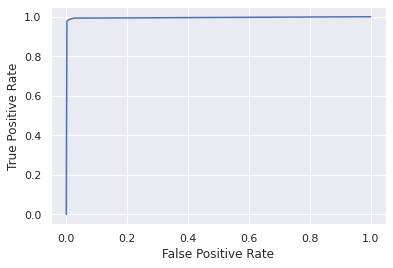

In [ ]:
#define metrics
y_pred_proba = classifier.predict_proba(xt_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yt_a, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(yt_a, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(yt_a, y_pred))

Accuracy: 0.988
Precision: 0.9906166219839142
Recall: 0.9853333333333333


Logistique Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(x_a, y_a)

LogisticRegression(penalty='none', solver='newton-cg')

In [ ]:
y_pred = modele_logit.predict(xt_a)

[[2778  222]
 [ 252 2748]]


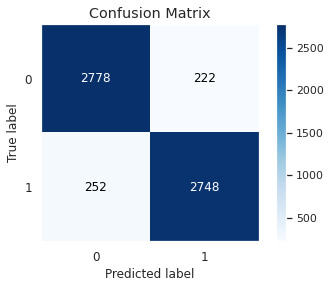

In [ ]:
print(metrics.confusion_matrix(yt_a, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a, y_pred)

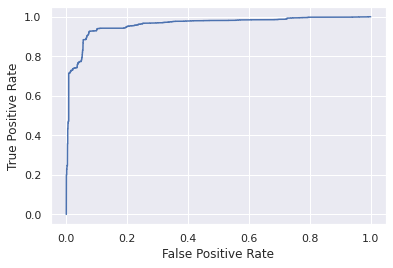

In [ ]:
#define metrics
y_pred_proba = modele_logit.predict_proba(xt_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yt_a, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(yt_a, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(yt_a, y_pred))

Accuracy: 0.921
Precision: 0.9252525252525252
Recall: 0.916


naïve bayésienne

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
y_pred = gnb.fit(x_a, y_a).predict(xt_a)

[[ 508 2492]
 [  35 2965]]


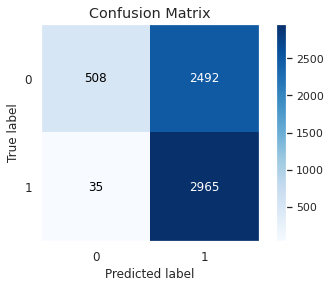

In [ ]:
print(metrics.confusion_matrix(yt_a, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a, y_pred)

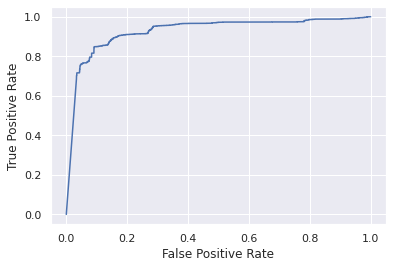

In [ ]:
#define metrics
y_pred_proba = gnb.predict_proba(xt_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yt_a, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(yt_a, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(yt_a, y_pred))

Accuracy: 0.5788333333333333
Precision: 0.5433388308594466
Recall: 0.9883333333333333
